# ABR Imagery Card Processing Analysis

## ABR Imagery recently switched their card processing company. The old card company took 3.4% of the transaction amount. The new card company takes 2% of the transaction amount with a \\$99 annual fee and a \\$20 / month fee. The goal of this anlaysis is to determine which card company is cheaper. The data for orders made in 2022 will be used to determine this. A file for this was made in Traverse from AR Detail History View and saved to an excel file titles "AR Detail History View.Xls".

In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
#opening file
ar_history_2022 = pd.read_excel("AR Detail History View.Xls")

In [3]:
#quick glance
ar_history_2022.head()

,Transaction ID,Transaction Date,Transaction Type,PmtMethodId,Amount
0,207333,1/1/2022,Payment,PAYPAL,172.03
1,207334,1/1/2022,Payment,PAYPAL,1032.26
2,207337,1/2/2022,Payment,PAYPAL,2979.44
3,207339,1/2/2022,Payment,PAYPAL,114.12
4,207341,1/3/2022,Payment,VISA,1049.43


### **Wanting orders that were paid with just card. so going to look at the unique payment methods in the column "PmtMethodIds" and determine which ones are cards. From there, I will subset the dataframe to only contain data with cards**

In [4]:
#looking at unique Payment Methods
list(ar_history_2022["PmtMethodId"].unique())

['PAYPAL',
 'VISA',
 'MASTER CAR',
 'CHECK',
 'AM EX',
 'CASH',
 'DISCOVER',
 'checktrade',
 'WIRE',
 nan,
 'bitpay']

### **So orders paid with a card are going to be Visa, Master Car, AM EX, Discover. Those are all debit/credit card company names. the others are different forms of payment.**

In [5]:
#constraining data to just card orders
ar_history_2022_card = ar_history_2022[ar_history_2022["PmtMethodId"].isin(["VISA", "MASTER CAR", "AM EX", "DISCOVER"])]

#viewing output
ar_history_2022_card.head()

,Transaction ID,Transaction Date,Transaction Type,PmtMethodId,Amount
4,207341,1/3/2022,Payment,VISA,1049.43
5,207342,1/3/2022,Payment,VISA,450.57
6,207346,1/3/2022,Payment,MASTER CAR,45.00
8,207345,1/3/2022,Payment,VISA,184.95
9,207319,1/3/2022,Payment,MASTER CAR,60.03


### **The old card company had a processing fee of 3.4% on all transactions. The new card company has a processing fee of 2%. I will calculate these for the amounts and add them as columns to the data**

In [6]:
#settingwithcopywarning is being triggered, it is not valid in this circumstance since the amounts I am wanting to change are being applied to the original dataframe, not to a copy
pd.options.mode.chained_assignment = None

# adding new column for the old card company processessing fee of 3.4%
ar_history_2022_card["Old Processing Fee"] = round(ar_history_2022_card.loc[:,"Amount"] * 0.034, 2)

# adding new colum for the new card company processing fee of 2%
ar_history_2022_card["New Processing Fee"] = round(ar_history_2022_card.loc[:,"Amount"] * 0.02, 2)

In [7]:
#viewing result
ar_history_2022_card.head()

,Transaction ID,Transaction Date,Transaction Type,PmtMethodId,Amount,Old Processing Fee,New Processing Fee
4,207341,1/3/2022,Payment,VISA,1049.43,35.68,20.99
5,207342,1/3/2022,Payment,VISA,450.57,15.32,9.01
6,207346,1/3/2022,Payment,MASTER CAR,45.00,1.53,0.90
8,207345,1/3/2022,Payment,VISA,184.95,6.29,3.70
9,207319,1/3/2022,Payment,MASTER CAR,60.03,2.04,1.20


### **The old card company only had a processing fee. So for the total, just need to add those up. The new card company has the processing fee + 99 + 20 / month.**

In [8]:
#looking at total for old card company
old_card_fee_total = ar_history_2022_card["Old Processing Fee"].sum()

In [9]:
#Looking at total for new card company. the flat amount to add is 99 + (20 * 12)
additional_fees = 99 + (20 * 12)
new_card_fee_total = ar_history_2022_card["New Processing Fee"].sum() + additional_fees

In [10]:
print("The Old Card Company total for fees in 2022 was " + str(old_card_fee_total))
print("The New Card Company total for fees in 2022 was " + str(new_card_fee_total))

The Old Card Company total for fees in 2022 was 49773.34
The New Card Company total for fees in 2022 was 29617.53


In [11]:
ratio = round(old_card_fee_total/new_card_fee_total, 2)
print("The Old Card Company Total Fees were " + str(ratio) + "x more.")

The Old Card Company Total Fees were 1.68x more.


# The Old Card Company total for fees in 2022 was about \\$50,000. The New Card Company Total for fees in 2022 was about \\$30,000. The old card company is 1.68x more expensive than the new card company.

In [12]:
#saving to file, incase I want to use this information in a different program
ar_history_2022_card.to_excel("AR HIstory 2022 with Card Fees.xlsx", index = False)

### **The processing fees for each month are going to be totaled and compared.**

In [13]:
#making transaction date a datetime object, doing this to extract months
ar_history_2022_card["Transaction Date"] = pd.to_datetime(ar_history_2022_card["Transaction Date"], format = "%m/%d/%Y")

In [14]:
# making the transaction date the index
ar_history_2022_card.set_index("Transaction Date", inplace = True)
ar_history_2022_card

,Transaction ID,Transaction Type,PmtMethodId,Amount,Old Processing Fee,New Processing Fee
Transaction Date,,,,,,
2022-01-03,207341,Payment,VISA,1049.43,35.68,20.99
2022-01-03,207342,Payment,VISA,450.57,15.32,9.01
2022-01-03,207346,Payment,MASTER CAR,45.00,1.53,0.90
2022-01-03,207345,Payment,VISA,184.95,6.29,3.70
2022-01-03,207319,Payment,MASTER CAR,60.03,2.04,1.20
...,...,...,...,...,...,...
2022-12-30,218304,Payment,VISA,183.44,6.24,3.67
2022-12-30,218310,Payment,VISA,389.19,13.23,7.78
2022-12-30,218327,Payment,VISA,27.90,0.95,0.56


In [15]:
# grouping by month and looking at totals, will need to add 20 for each month on the new processing and also add 99/12 for the annual fee
monthly_totals = ar_history_2022_card.groupby(ar_history_2022_card.index.month).agg({"Old Processing Fee" : sum, "New Processing Fee" : sum})
monthly_totals

,Old Processing Fee,New Processing Fee
Transaction Date,,
1,4400.63,2588.60
2,4557.12,2680.71
3,6686.41,3933.20
4,5192.02,3054.13
5,4457.44,2622.00
6,3635.04,2138.22
7,3509.05,2064.18
8,4231.61,2489.18
9,3125.15,1838.31


In [16]:
#adding 20 + 99/12 to new processing fee
monthly_totals["New Processing Fee"] = monthly_totals["New Processing Fee"] + 20 + round((99/12), 2)

## **Viewing monthly totals**

In [17]:
monthly_totals

,Old Processing Fee,New Processing Fee
Transaction Date,,
1,4400.63,2616.85
2,4557.12,2708.96
3,6686.41,3961.45
4,5192.02,3082.38
5,4457.44,2650.25
6,3635.04,2166.47
7,3509.05,2092.43
8,4231.61,2517.43
9,3125.15,1866.56


## **Going to make bar graphs comparing the 2 different card companies across the months of 2022**

In [18]:
#importing needed modules
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", 50)
pd.options.mode.chained_assignment = None  # default='warn'

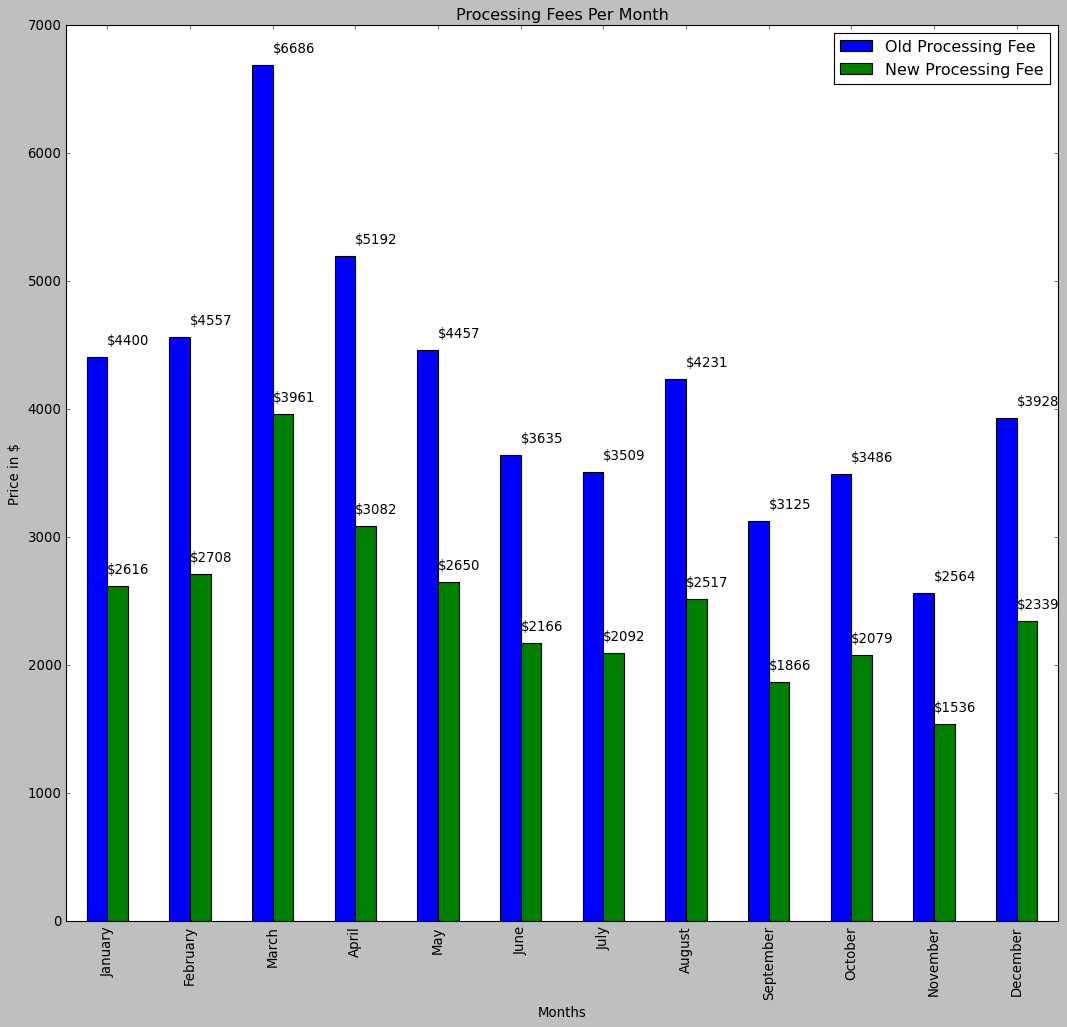

In [19]:
#plot for totals

style.use('classic')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_totals['Month_names'] = months
monthly_totals.plot(kind= 'bar', x = 'Month_names', y = ['Old Processing Fee', "New Processing Fee"], figsize = (16,14))

for x,y in zip(np.arange(0,12), monthly_totals["Old Processing Fee"]):
    plt.text(x = x , y = y + 100 , s = "$" + str(int(y)))
    
for x,y in zip(np.arange(0,12), monthly_totals["New Processing Fee"]):
    plt.text( x = x, y = y + 100, s = "$" + str(int(y)))

plt.xlabel('Months')
plt.ylabel('Price in $')
plt.title('Processing Fees Per Month')
plt.savefig("Processing Fees Per Month")

## **Making a bar graph for the difference between the old card company and new card company monthly in 2022**

In [20]:
#plot for differences
monthly_totals["Difference between new and old"] = abs(monthly_totals["New Processing Fee"] - monthly_totals["Old Processing Fee"])
monthly_totals

,Old Processing Fee,New Processing Fee,Month_names,Difference between new and old
Transaction Date,,,,
1,4400.63,2616.85,January,1783.78
2,4557.12,2708.96,February,1848.16
3,6686.41,3961.45,March,2724.96
4,5192.02,3082.38,April,2109.64
5,4457.44,2650.25,May,1807.19
6,3635.04,2166.47,June,1468.57
7,3509.05,2092.43,July,1416.62
8,4231.61,2517.43,August,1714.18
9,3125.15,1866.56,September,1258.59


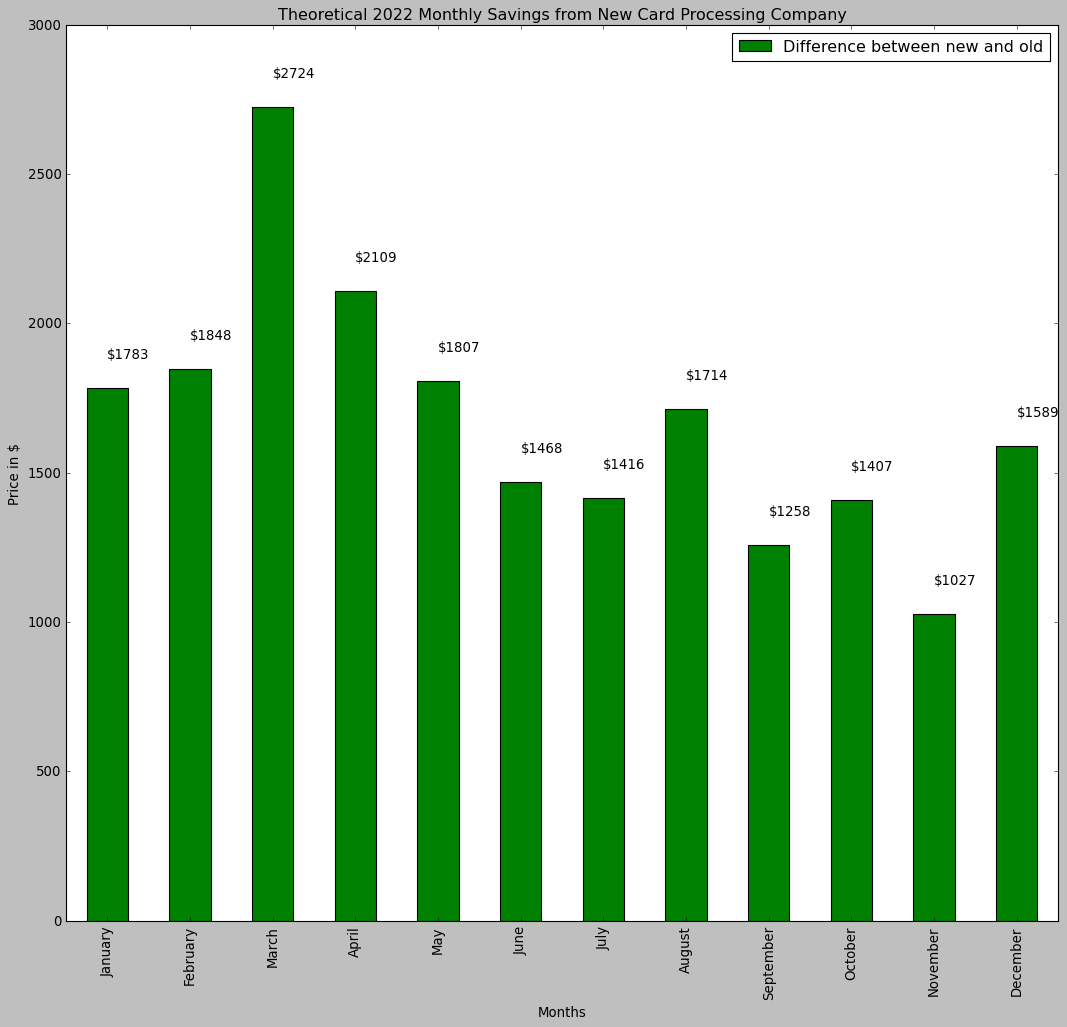

In [21]:
style.use('classic')
monthly_totals.plot(kind= 'bar', x = 'Month_names', y = ["Difference between new and old"], figsize = (16,14), color = 'g')

for x,y in zip(np.arange(0,12), monthly_totals["Difference between new and old"]):
    plt.text(x = x , y = y + 100 , s = "$" + str(int(y)))
                                               
plt.xlabel('Months')
plt.ylabel('Price in $')
plt.title('Theoretical 2022 Monthly Savings from New Card Processing Company')
plt.savefig("Theoretical 2022 Monthly Savings from New Card Processing Company")

In [24]:
#looking at the sum of the differences each month
print(round(monthly_totals["Difference between new and old"].sum()), 2)

#looking at the average amount saved per month
print(round(monthly_totals["Difference between new and old"].mean(), 2))

20156 2
1679.65


# **Summary**

## **The total theoretical savings of 2022 could have been \\$20,000 if the new card processing company was being used. The old card processing company was 1.68x more expensive than the new card company. The new card processing company gives an average savings per month of \\$1,600. Overall, the new card company processing fees are cheaper than the old card company processing fees.**